<a href="https://colab.research.google.com/github/SostenesJr/Projeto-Turing/blob/main/Teste_de_correla%C3%A7%C3%B5es_v_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Código Inicial — Levantamento Inicial, Visualização e Pré-Processamento dos Dados

Neste bloco, realizo a visualização inicial do dataset do **Sistema de Informações sobre Mortalidade (SIM)**. Também inicio o cálculo de colunas dependentes da variável alvo.

📄 **Fonte dos dados (CSV):**  
https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO23OPEN.csv

📘 **Dicionário de Dados (Data Dictionary):**  
https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral+-+Estrutura.pdf

 **Site Base dos dados:**  
https://opendatasus.saude.gov.br/dataset/sim/

**Documentação Pysus**

## Importando Bibliotecas e dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

## Importando conjunto de dados 2023 pelo frontend

In [2]:
# URL do arquivo CSV
url = "https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO23OPEN.csv"

# Lê o arquivo CSV diretamente da URL
df = pd.read_csv(url, sep=';', encoding='latin1', low_memory=False)

# Exibe as 5 primeiras linhas
print(df.head())

   contador  ORIGEM  TIPOBITO   DTOBITO  HORAOBITO  NATURAL  CODMUNNATU  \
0         1       1         2  14022023      930.0    833.0    330270.0   
1         2       1         2  14022023     1730.0    822.0    221110.0   
2         3       1         2  14022023      500.0    822.0    220790.0   
3         4       1         2  14022023     2235.0    823.0    231180.0   
4         5       1         2  14022023      940.0    841.0    411350.0   

       DTNASC  IDADE  SEXO  ...  TPRESGINFO  TPNIVELINV  DTCADINF  MORTEPARTO  \
0  10071954.0    468     1  ...         NaN         NaN       NaN         NaN   
1  12091956.0    466     1  ...         NaN         NaN       NaN         NaN   
2  10011953.0    470     2  ...         NaN         NaN       NaN         NaN   
3  15121943.0    479     2  ...         NaN         NaN       NaN         NaN   
4   9041973.0    449     2  ...         NaN           M       NaN         NaN   

   DTCONCASO  ALTCAUSA  CAUSABAS_O  TPPOS  TP_ALTERA  CB_ALT  

## Visualização das colunas e 5 linhas

In [3]:
df.head()

,contador,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,1,1,2,14022023,930.0,833.0,330270.0,10071954.0,468,1,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN
1,2,1,2,14022023,1730.0,822.0,221110.0,12091956.0,466,1,...,NaN,NaN,NaN,NaN,NaN,NaN,I678,NaN,NaN,NaN
2,3,1,2,14022023,500.0,822.0,220790.0,10011953.0,470,2,...,NaN,NaN,NaN,NaN,NaN,NaN,K750,NaN,NaN,NaN
3,4,1,2,14022023,2235.0,823.0,231180.0,15121943.0,479,2,...,NaN,NaN,NaN,NaN,NaN,NaN,I64,S,NaN,NaN
4,5,1,2,14022023,940.0,841.0,411350.0,9041973.0,449,2,...,NaN,M,NaN,NaN,NaN,NaN,C189,S,NaN,NaN


## Visualização das Colunas

In [4]:
df.columns

Index(['contador', 'ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NATURAL',
       'CODMUNNATU', 'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC',
       'ESC2010', 'SERIESCFAL', 'OCUP', 'CODMUNRES', 'LOCOCOR', 'CODESTAB',
       'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010', 'SERIESCMAE',
       'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC',
       'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO', 'OBITOGRAV',
       'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA', 'NECROPSIA', 'LINHAA',
       'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'CB_PRE',
       'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE',
       'NUMEROLOTE', 'DTINVESTIG', 'DTCADASTRO', 'ATESTANTE', 'STCODIFICA',
       'CODIFICADO', 'VERSAOSIST', 'VERSAOSCB', 'FONTEINV', 'DTRECEBIM',
       'ATESTADO', 'DTRECORIGA', 'OPOR_DO', 'CAUSAMAT', 'ESCMAEAGR1',
       'ESCFALAGR1', 'STDOEPIDEM', 'STDONOVA', 'DIFDATA', 'NUDIASOBCO',
       'DTCADINV', 'TPOBITOCOR', 'DTCONINV',

## Tamanho do Dataframe

In [5]:
df.shape

(1465610, 86)

## Limpeza

In [6]:
# Remove rows where 'CIRCOBITO' is null
df_cleaned_circo = df.dropna(subset=['CIRCOBITO']).copy()

# Display the shape of the cleaned DataFrame
print("Shape of the DataFrame after removing nulls in 'CIRCOBITO':")
print(df_cleaned_circo.shape)

# Display the count of nulls in 'CIRCOBITO' in the cleaned DataFrame
print("\nNull count in 'CIRCOBITO' after cleaning:")
print(df_cleaned_circo['CIRCOBITO'].isnull().sum())

Shape of the DataFrame after removing nulls in 'CIRCOBITO':
(153897, 86)

Null count in 'CIRCOBITO' after cleaning:
0


## Analise para verificar os nulos

In [7]:
# Total de entradas
total = len(df)
coluna = 'CIRCOBITO'

# Verificações
nulos = df[coluna].isnull().sum()
vazios = (df[coluna] == '').sum()
nan_texto = (df[coluna].astype(str).str.upper() == 'NAN').sum()

# Numéricos (exclui NaN e vazios antes de checar)
numericos = pd.to_numeric(df[coluna], errors='coerce').notna().sum()

# Percentuais
print(f"Análise da coluna {coluna} (%):")
print(f"- Valores nulos (NaN/None): {nulos / total:.2%}")
print(f"- Valores em branco (''): {vazios / total:.2%}")
print(f"- Texto 'NaN': {nan_texto / total:.2%}")
print(f"- Valores numéricos válidos: {numericos / total:.2%}")
print(f"- Temos {df.shape[0] - nulos} dados para trabalhar")

Análise da coluna CIRCOBITO (%):
- Valores nulos (NaN/None): 89.50%
- Valores em branco (''): 0.00%
- Texto 'NaN': 89.50%
- Valores numéricos válidos: 10.50%
- Temos 153897 dados para trabalhar


## Coluna Limpa do dataframe

In [8]:
df_cleaned_circo['CIRCOBITO'].value_counts()

CIRCOBITO
1.0    68526
3.0    41613
9.0    22491
2.0    16259
4.0     5008
Name: count, dtype: int64

In [9]:
df_suicidio = df[df['CIRCOBITO'] == 2]

In [10]:
df_suicidio

,contador,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,10,1,2,14022023,2024.0,843.0,431490.0,26021981.0,441,2,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN
102,103,1,2,1012023,NaN,842.0,420540.0,9051982.0,440,2,...,NaN,M,NaN,NaN,NaN,NaN,X804,S,NaN,NaN
160,161,1,2,1012023,NaN,NaN,NaN,29111990.0,432,2,...,NaN,M,NaN,NaN,NaN,NaN,X689,S,NaN,NaN
184,185,1,2,1012023,NaN,843.0,432070.0,7121962.0,460,1,...,NaN,NaN,NaN,NaN,NaN,NaN,X804,N,NaN,NaN
185,186,1,2,1012023,NaN,843.0,432260.0,15011991.0,431,1,...,NaN,NaN,NaN,NaN,NaN,NaN,X704,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465530,1465531,2,2,18112023,NaN,831.0,316050.0,15081970.0,453,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465589,1465590,1,2,27092023,2000.0,816.0,160015.0,26032005.0,418,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465595,1465596,1,2,1112023,1900.0,813.0,130140.0,1012011.0,412,2,...,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465603,1465604,1,2,26112023,1540.0,813.0,130140.0,1012002.0,421,2,...,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Se refere ao atendimento médico continuado que o paciente recebeu, ou não,durante a enfermidade que ocasionou o óbito. (1 – sim; 2 – não; 9 – ignorado)

In [11]:
df_suicidio['ASSISTMED'].value_counts()

ASSISTMED
2.0    9995
1.0    2420
9.0    1145
Name: count, dtype: int64

## Tipo de morte violenta ou circunstâncias em que se deu a morte não natural.(1 – acidente; 2 – suicídio; 3 – homicídio; 4 – outros; 9 – ignorado)

In [12]:
df_suicidio = df[df['CIRCOBITO'] == 2]

## Grafico de Pizza sobre as % de cada obito

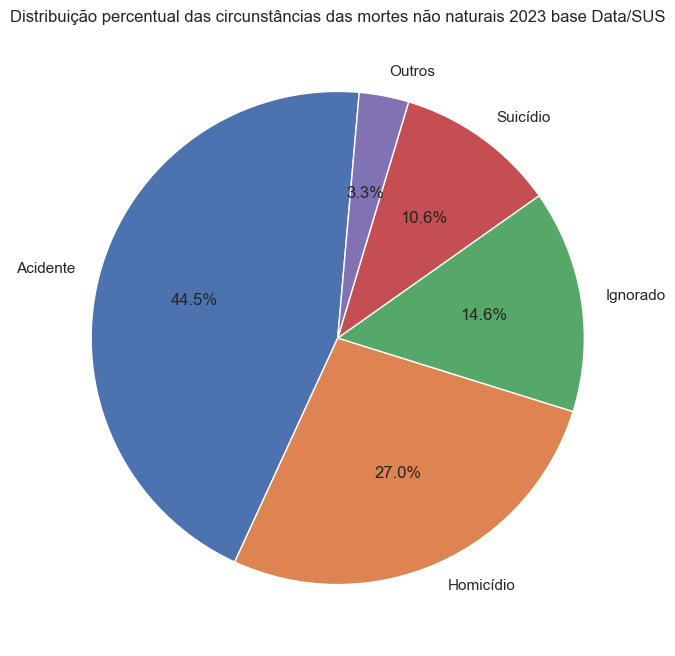

In [13]:
# Estilo visual do Seaborn
sns.set(style="whitegrid")

# Substitui os códigos pelos nomes
df['CIRCOBITO_LABEL'] = df['CIRCOBITO'].map({
    1: 'Acidente',
    2: 'Suicídio',
    3: 'Homicídio',
    4: 'Outros',
    9: 'Ignorado'
})

# Conta os valores e calcula a porcentagem
circo_counts = df['CIRCOBITO_LABEL'].value_counts()
circo_percent = circo_counts / circo_counts.sum() * 100

# Gráfico de pizza
plt.figure(figsize=(7, 8))
plt.pie(
    circo_percent,
    labels=circo_percent.index,
    autopct='%1.1f%%',
    startangle=85
)
plt.title('Distribuição percentual das circunstâncias das mortes não naturais 2023 base Data/SUS')
plt.axis('equal')  # Mantém o formato circular
plt.show()

## Matriz de Confusão -- Assistmed

In [14]:
# 2. CRIAÇÃO DA VARIÁVEL ALVO
# O alvo é 1 se CIRCOBITO for 2, senão é 0.
df_cleaned_circo['alvo'] = (df_cleaned_circo['CIRCOBITO'] == 2).astype(int)


# 3. CRIAÇÃO DO "PALPITE" BASEADO NA ASSISTÊNCIA MÉDICA
# Nossa hipótese: prever suicídio (1) se ASSISTMED for 2 (Não recebeu assistência).
df_cleaned_circo['palpite_assistmed'] = (df_cleaned_circo['ASSISTMED'] == 2).astype(int)

print("--- DataFrame Final com Alvo e Palpite ---")
print(df_cleaned_circo)
print("\n" + "="*40 + "\n")


# 4. AVALIAÇÃO DA QUALIDADE DO PALPITE
# Removemos registros com dados ignorados (código 9) para uma avaliação justa
df_valido = df_cleaned_circo.query('CIRCOBITO != 9 and ASSISTMED != 9').copy()

if not df_valido.empty:
    y_true = df_valido['alvo']
    y_pred = df_valido['palpite_assistmed']

    print("--- Avaliação da Hipótese (ASSISTMED prevê Suicídio) ---")

    # Matriz de Confusão
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))

    # Relatório Completo
    print("\nRelatório de Classificação:")
    print(classification_report(y_true, y_pred, target_names=['Não Suicídio (0)', 'Suicídio (1)']))
else:
    print("Não há dados válidos para avaliação após a filtragem.")

--- DataFrame Final com Alvo e Palpite ---
         contador  ORIGEM  TIPOBITO   DTOBITO  HORAOBITO  NATURAL  CODMUNNATU  \
5               6       1         2  14022023      906.0    835.0    355330.0   
9              10       1         2  14022023     2024.0    843.0    431490.0   
22             23       1         2  14022023     2140.0    835.0    352430.0   
39             40       1         2   1012023     1027.0    824.0    240810.0   
47             48       1         2   1012023     1450.0    835.0    355030.0   
...           ...     ...       ...       ...        ...      ...         ...   
1465589   1465590       1         2  27092023     2000.0    816.0    160015.0   
1465595   1465596       1         2   1112023     1900.0    813.0    130140.0   
1465600   1465601       1         2  10112023     2300.0    816.0    160030.0   
1465603   1465604       1         2  26112023     1540.0    813.0    130140.0   
1465608   1465609       1         2  22122023     2030.0    813.0 